In [4]:
import pandas as pd
df  =pd.read_csv(r'C:\Users\Admin\Desktop\ml model\Data for MSC Thesis\ourproject3.csv')
df.head()

,ea_id,cs2q01,saq14,saq01,saq02,saq03,saq04,saq05,saq06,saq07,cs2q02,cs2q03,cs2q04,cs2q05_1,cs2q05_2,cs2q05_oth,cs2q06,cs2q07,cs2q07_oth
0,20101010100104,1,2. URBAN,2. AFAR,1,1,1,1,1,4,**CONFIDENTIAL**,1. Male,50,1. Chairman/woman,3. Elderly,NaN,50,1. None/ illitrate,NaN
1,20101010100104,2,2. URBAN,2. AFAR,1,1,1,1,1,4,**CONFIDENTIAL**,1. Male,40,3. Elderly,11. Other (Specify),Local administrator,40,3. Primary school completed,NaN
2,20101010100104,3,2. URBAN,2. AFAR,1,1,1,1,1,4,**CONFIDENTIAL**,1. Male,37,11. Other (Specify),NaN,Political party bureau head,37,3. Primary school completed,NaN
3,20101010100104,4,2. URBAN,2. AFAR,1,1,1,1,1,4,**CONFIDENTIAL**,1. Male,38,11. Other (Specify),NaN,Vital events officer,38,2. Incomplete primary school,NaN
4,20101010100104,5,2. URBAN,2. AFAR,1,1,1,1,1,4,**CONFIDENTIAL**,1. Male,60,3. Elderly,NaN,NaN,27,2. Incomplete primary school,NaN


In [5]:
# Rename all columns to readable names
df = df.rename(columns={
    'ea_id': 'ea_id',                    # keep original if needed
    'cs2q01': 'person_id',               # can drop later
    'saq14': 'residence',                # Urban / Rural
    'saq01': 'region',                   # e.g., Afar
    'saq02': 'context_q2',
    'saq03': 'context_q3',
    'saq04': 'context_q4',
    'saq05': 'context_q5',
    'saq06': 'context_q6',
    'saq07': 'context_q7',
    'cs2q02': 'confidential_code',       # seems confidential, keep for now
    'cs2q03': 'sex',
    'cs2q04': 'age',
    'cs2q05_1': 'primary_role',
    'cs2q05_2': 'secondary_role',
    'cs2q05_oth': 'primary_role_other',  # mostly empty, can drop later
    'cs2q06': 'unknown_code',
    'cs2q07': 'education_level',         # 🎯 target
    'cs2q07_oth': 'education_extra'      # extra info
})


In [6]:
df.isnull().sum()


ea_id                    0
person_id                0
residence                0
region                   0
context_q2               0
context_q3               0
context_q4               0
context_q5               0
context_q6               0
context_q7               0
confidential_code        0
sex                      0
age                      0
primary_role             0
secondary_role        2290
primary_role_other    1916
unknown_code             0
education_level          0
education_extra       2209
dtype: int64

In [7]:
print(df.shape)
print(df.columns)

(2335, 19)
Index(['ea_id', 'person_id', 'residence', 'region', 'context_q2', 'context_q3',
       'context_q4', 'context_q5', 'context_q6', 'context_q7',
       'confidential_code', 'sex', 'age', 'primary_role', 'secondary_role',
       'primary_role_other', 'unknown_code', 'education_level',
       'education_extra'],
      dtype='object')


In [8]:
# -------------------------------
# Drop unnecessary columns
# -------------------------------
columns_to_drop = ['ea_id', 'person_id', 'primary_role_other', 'confidential_code']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# -------------------------------
# Fill missing values in remaining categorical columns
# -------------------------------
if 'secondary_role' in df.columns:
    df['secondary_role'] = df['secondary_role'].fillna('None')

if 'education_extra' in df.columns:
    df['education_extra'] = df['education_extra'].fillna('Unknown')

# -------------------------------
# Check result
# -------------------------------
print(df.shape)
print(df.columns)
print(df.isnull().sum())


(2335, 15)
Index(['residence', 'region', 'context_q2', 'context_q3', 'context_q4',
       'context_q5', 'context_q6', 'context_q7', 'sex', 'age', 'primary_role',
       'secondary_role', 'unknown_code', 'education_level', 'education_extra'],
      dtype='object')
residence          0
region             0
context_q2         0
context_q3         0
context_q4         0
context_q5         0
context_q6         0
context_q7         0
sex                0
age                0
primary_role       0
secondary_role     0
unknown_code       0
education_level    0
education_extra    0
dtype: int64


In [9]:
df.duplicated().sum()


236

In [10]:
df = df.drop_duplicates()

print("✅ Duplicates removed.")
print("New shape:", df.shape)
print("Remaining duplicates:", df.duplicated().sum())

✅ Duplicates removed.
New shape: (2099, 15)
Remaining duplicates: 0


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your dataframe
categorical_cols = ['residence', 'region', 'context_q2', 'context_q3', 'context_q4',
                    'context_q5', 'context_q6', 'context_q7', 'sex', 
                    'primary_role', 'secondary_role', 'education_extra']

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Label encoding for target variable (education_level)
le = LabelEncoder()
df_encoded['education_level'] = le.fit_transform(df['education_level'])

# Convert all True/False to 1/0
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes(include='bool').columns})

print(df_encoded.head())


   age  unknown_code  education_level  residence_2. URBAN  region_13. HARAR  \
0   50            50                0                   1                 0   
1   40            40                2                   1                 0   
2   37            37                2                   1                 0   
3   38            38                1                   1                 0   
4   60            27                1                   1                 0   

   region_14. ADDIS ABABA  region_15. DIRE DAWA  region_2. AFAR  \
0                       0                     0               1   
1                       0                     0               1   
2                       0                     0               1   
3                       0                     0               1   
4                       0                     0               1   

   region_3. AMHARA  region_4. OROMIA  ...  \
0                 0                 0  ...   
1                 0           

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df_encoded is your fully preprocessed dataframe
# Drop the target variable
X = df_encoded.drop('education_level', axis=1)

# Ensure all columns are numeric (0/1 for booleans or dummy variables)
X = X.apply(pd.to_numeric, errors='coerce')

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Replace infinite VIFs with a large number for easier interpretation
vif_data["VIF"].replace([float('inf'), -float('inf')], 999, inplace=True)

# Display sorted VIF values
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

# Optionally, flag features with high multicollinearity (VIF > 10)
high_vif = vif_data_sorted[vif_data_sorted['VIF'] > 10]
print("\nFeatures with high multicollinearity (VIF > 10):")
print(high_vif)


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


           feature         VIF
60   context_q3_28  999.000000
66    context_q4_8  999.000000
33   context_q2_24  999.000000
34   context_q2_28  999.000000
149  context_q7_52  999.000000
..             ...         ...
105  context_q6_32    1.225603
112  context_q6_46    1.221633
104  context_q6_31    1.221570
114  context_q6_67    1.206988
102  context_q6_28    1.206807

[179 rows x 2 columns]

Features with high multicollinearity (VIF > 10):
                    feature         VIF
60            context_q3_28  999.000000
66             context_q4_8  999.000000
33            context_q2_24  999.000000
34            context_q2_28  999.000000
149           context_q7_52  999.000000
144           context_q7_45  999.000000
35            context_q2_30  999.000000
36            context_q2_31  999.000000
37            context_q2_35  999.000000
76            context_q5_88  999.000000
32            context_q2_23  999.000000
61            context_q3_30  999.000000
58            context_q3_24  999.0

C:\Users\Admin\AppData\Local\Temp\ipykernel_7388\1305777019.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vif_data["VIF"].replace([float('inf'), -float('inf')], 999, inplace=True)


In [15]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = your feature dataframe (after encoding, excluding target)
X = df_encoded.drop('education_level', axis=1)  # drop your target

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

def calculate_vif(X):
    """Calculate VIF for all features"""
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Replace infinite VIF with a large number
    vif_data["VIF"] = vif_data["VIF"].replace([float('inf'), -float('inf')], 999)
    return vif_data

# Iteratively drop features with VIF > 10
max_vif = 999
X_reduced = X.copy()

while max_vif > 10:
    vif_data = calculate_vif(X_reduced)
    max_vif = vif_data['VIF'].max()
    if max_vif > 10:
        # Drop the feature with the highest VIF
        drop_feature = vif_data.sort_values('VIF', ascending=False)['feature'].iloc[0]
        print(f"Dropping feature '{drop_feature}' with VIF = {max_vif}")
        X_reduced = X_reduced.drop(columns=[drop_feature])

print("\nFinal features after removing multicollinearity:")
print(X_reduced.columns)

# Optionally, view final VIFs
final_vif = calculate_vif(X_reduced).sort_values(by='VIF', ascending=False)
print(final_vif)


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q3_28' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q4_8' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q3_24' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q3_23' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q7_52' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q7_85' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q7_45' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q3_35' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q3_30' with VIF = 999.0


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'context_q3_31' with VIF = 999.0
Dropping feature 'context_q5_88' with VIF = 462.3310142683907
Dropping feature 'secondary_role_None' with VIF = 98.72102576660596
Dropping feature 'age' with VIF = 29.05639365406028
Dropping feature 'education_extra_Unknown' with VIF = 19.92999823995458
Dropping feature 'region_14. ADDIS ABABA' with VIF = 14.85522023614077

Final features after removing multicollinearity:
Index(['unknown_code', 'residence_2. URBAN', 'region_13. HARAR',
       'region_15. DIRE DAWA', 'region_2. AFAR', 'region_3. AMHARA',
       'region_4. OROMIA', 'region_5. SOMALI', 'region_6. BENISHANGUL GUMUZ',
       'region_7. SNNP',
       ...
       'secondary_role_2. Representative', 'secondary_role_3. Elderly',
       'secondary_role_4. School Headmaster',
       'secondary_role_5. School Teacher',
       'secondary_role_6. Agricultural Extension/Development Officier',
       'secondary_role_7. Health Worker',
       'secondary_role_8. Business Man/Woman',
     

In [14]:
import pandas as pd

# y = your target variable
y = df_encoded['education_level']  # replace with your target column

# Count of each class
class_counts = y.value_counts()
print("Class counts:")
print(class_counts)

# Percentage of each class
class_percent = y.value_counts(normalize=True) * 100
print("\nClass distribution (%):")
print(class_percent)


Class counts:
education_level
5    974
1    301
0    219
4    201
2    168
3    120
6    116
Name: count, dtype: int64

Class distribution (%):
education_level
5    46.403049
1    14.340162
0    10.433540
4     9.575989
2     8.003811
3     5.717008
6     5.526441
Name: proportion, dtype: float64


In [21]:
from imblearn.over_sampling import SMOTE

# y = target variable
y = df_encoded['education_level']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the VIF-reduced features
X_balanced, y_balanced = smote.fit_resample(X_reduced, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

# Now X_balanced and y_balanced are ready for model training


Class distribution after SMOTE:
education_level
0    974
2    974
1    974
6    974
4    974
5    974
3    974
Name: count, dtype: int64


In [24]:
import pandas as pd

# Convert X_balanced back to DataFrame (with original column names)
X_balanced_df = pd.DataFrame(X_balanced, columns=X_reduced.columns)

# Convert y_balanced to Series (if it's not already)
y_balanced_df = pd.Series(y_balanced, name='education_level')

# Combine X and y to see the full dataset
balanced_df = pd.concat([X_balanced_df, y_balanced_df], axis=1)

# View the first few rows
print(balanced_df.head())

# Optional: check info and shape
print("\nShape of balanced dataset:", balanced_df.shape)
print(balanced_df.info())

# Optional: check class distribution
print("\nClass distribution after SMOTE:")
print(balanced_df['education_level'].value_counts())


   unknown_code  residence_2. URBAN  region_13. HARAR  region_15. DIRE DAWA  \
0            50                   1                 0                     0   
1            40                   1                 0                     0   
2            37                   1                 0                     0   
3            38                   1                 0                     0   
4            27                   1                 0                     0   

   region_2. AFAR  region_3. AMHARA  region_4. OROMIA  region_5. SOMALI  \
0               1                 0                 0                 0   
1               1                 0                 0                 0   
2               1                 0                 0                 0   
3               1                 0                 0                 0   
4               1                 0                 0                 0   

   region_6. BENISHANGUL GUMUZ  region_7. SNNP  ...  \
0                  

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X_balanced_df)

# Convert back to DataFrame for convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=X_balanced_df.columns)

# Optional: view the first few rows
print(X_scaled_df.head())

# Optional: check statistics
print("\nFeature scaling summary:")
print(X_scaled_df.describe())


   unknown_code  residence_2. URBAN  region_13. HARAR  region_15. DIRE DAWA  \
0      1.074827            1.483556         -0.191011             -0.169769   
1      0.535345            1.483556         -0.191011             -0.169769   
2      0.373500            1.483556         -0.191011             -0.169769   
3      0.427448            1.483556         -0.191011             -0.169769   
4     -0.165983            1.483556         -0.191011             -0.169769   

   region_2. AFAR  region_3. AMHARA  region_4. OROMIA  region_5. SOMALI  \
0        7.035887         -0.277043         -0.276736         -0.245311   
1        7.035887         -0.277043         -0.276736         -0.245311   
2        7.035887         -0.277043         -0.276736         -0.245311   
3        7.035887         -0.277043         -0.276736         -0.245311   
4        7.035887         -0.277043         -0.276736         -0.245311   

   region_6. BENISHANGUL GUMUZ  region_7. SNNP  ...  \
0                  

In [26]:
from sklearn.model_selection import train_test_split

# X_scaled_df = features after scaling
# y_balanced_df = target variable after SMOTE
X = X_scaled_df
y = y_balanced_df

# Stratified split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # reproducible results
    stratify=y            # ensures same class distribution in train and test
)

# Check the shape of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Optional: check class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())


Training set shape: (5454, 164) (5454,)
Test set shape: (1364, 164) (1364,)

Class distribution in training set:
education_level
0    780
2    779
5    779
4    779
3    779
1    779
6    779
Name: count, dtype: int64

Class distribution in test set:
education_level
1    195
2    195
5    195
6    195
4    195
3    195
0    194
Name: count, dtype: int64


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train on the training set
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.4516

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       194
           1       0.47      0.28      0.35       195
           2       0.28      0.21      0.24       195
           3       0.30      0.73      0.42       195
           4       0.32      0.11      0.16       195
           5       0.66      0.76      0.71       195
           6       0.75      0.50      0.60       195

    accuracy                           0.45      1364
   macro avg       0.48      0.45      0.43      1364
weighted avg       0.48      0.45      0.43      1364


Confusion Matrix:
[[110  13  13  38   7  11   2]
 [ 45  55  29  46   5  15   0]
 [ 20  12  40  90  13  15   5]
 [  1   7  15 143   9   8  12]
 [ 10   9  34  93  21  20   8]
 [  6  18   6   4   6 149   6]
 [  5   3   7  69   5   8  98]]


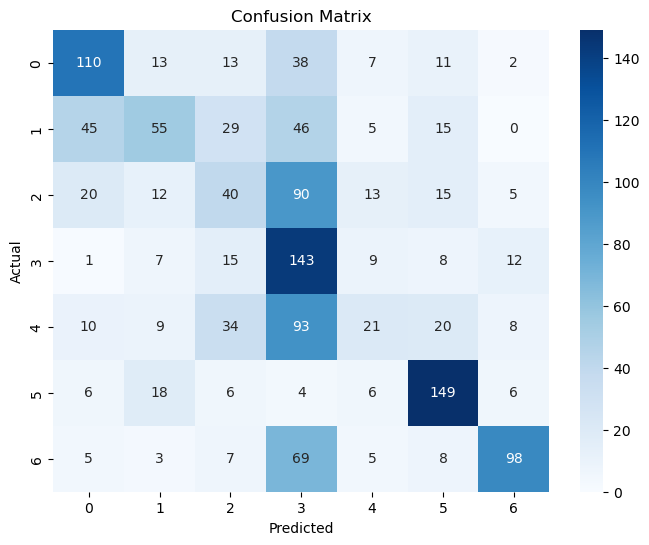

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Predict on the test set
y_pred = clf.predict(X_test)

# Step 2: Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 3: Detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Confusion matrix (optional visual)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Optional: visualize confusion matrix with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.4905

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.64      0.57       194
           1       0.43      0.28      0.34       195
           2       0.33      0.23      0.27       195
           3       0.33      0.57      0.42       195
           4       0.40      0.25      0.31       195
           5       0.79      0.80      0.79       195
           6       0.62      0.67      0.65       195

    accuracy                           0.49      1364
   macro avg       0.49      0.49      0.48      1364
weighted avg       0.49      0.49      0.48      1364


Confusion Matrix:
[[124  16  13  22  13   4   2]
 [ 62  54  25  30  11   7   6]
 [ 26  15  44  68  16   9  17]
 [  4  11  16 111  26   2  25]
 [ 17  19  29  55  49  11  15]
 [  3  10   4   5   3 156  14]
 [  4   1   4  42   4   9 131]]


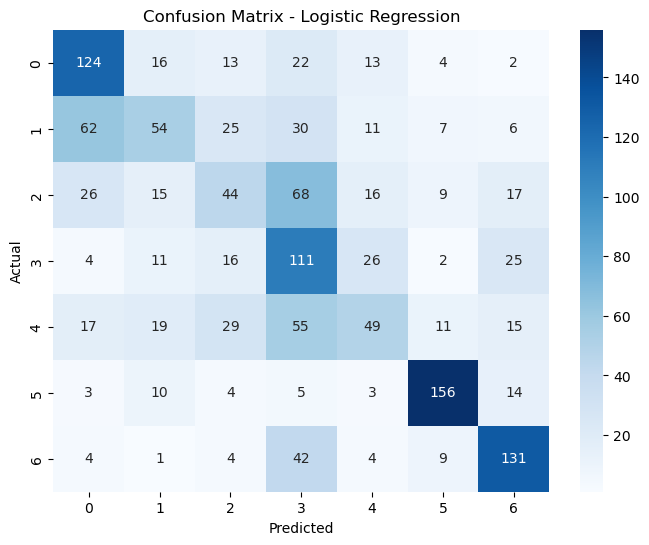

Accuracy: 0.4516

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       194
           1       0.47      0.28      0.35       195
           2       0.28      0.21      0.24       195
           3       0.30      0.73      0.42       195
           4       0.32      0.11      0.16       195
           5       0.66      0.76      0.71       195
           6       0.75      0.50      0.60       195

    accuracy                           0.45      1364
   macro avg       0.48      0.45      0.43      1364
weighted avg       0.48      0.45      0.43      1364


Confusion Matrix:
[[110  13  13  38   7  11   2]
 [ 45  55  29  46   5  15   0]
 [ 20  12  40  90  13  15   5]
 [  1   7  15 143   9   8  12]
 [ 10   9  34  93  21  20   8]
 [  6  18   6   4   6 149   6]
 [  5   3   7  69   5   8  98]]


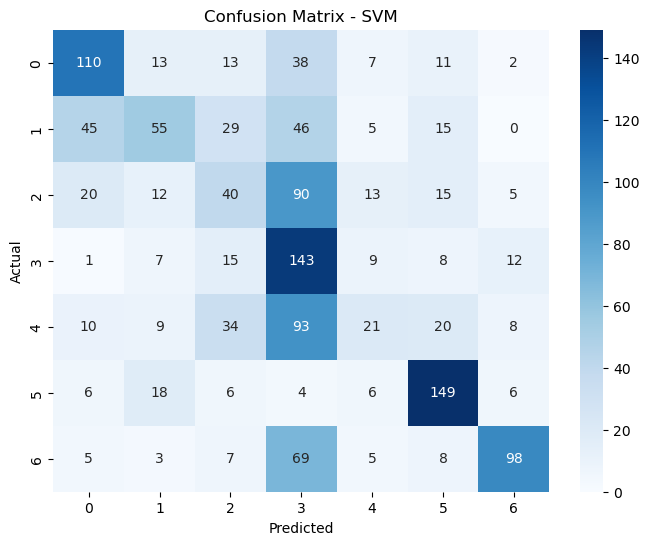